In [1]:
import pandas as pd
a=pd.read_csv('/content/Japan_life_expectancy.csv')
print(a)

   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
1       Akita            83.79      242.6        11.3        11.9   
2      Aomori            82.80      212.5        11.4        11.8   
3       Chiba            84.48      205.8        14.7        24.9   
4       Ehime            84.24      276.7        14.2        18.0   
5       Fukui            84.91      257.9        12.9        18.8   
6     Fukuoka            84.54      309.9        14.2        20.4   
7   Fukushima            83.71      205.7        11.6        13.1   
8        Gifu            84.71      224.5        13.4        18.5   
9       Gunma            84.16      233.8        14.7        17.5   
10  Hiroshima            85.06      267.1        16.1        23.1   
11   Hokkaido            84.00      251.3        14.1        14.4   
12      Hyogo            84.81      266.1        13.7        24.5   
13    Ibaraki            83.92    

In [2]:

X = a[['Prefecture', 'Physician']]
print(X)

   Prefecture  Physician
0       Aichi      224.4
1       Akita      242.6
2      Aomori      212.5
3       Chiba      205.8
4       Ehime      276.7
5       Fukui      257.9
6     Fukuoka      309.9
7   Fukushima      205.7
8        Gifu      224.5
9       Gunma      233.8
10  Hiroshima      267.1
11   Hokkaido      251.3
12      Hyogo      266.1
13    Ibaraki      193.8
14   Ishikawa      291.6
15      Iwate      207.3
16     Kagawa      290.0
17  Kagoshima      283.6
18   Kanagawa      223.0
19      Kochi      322.0
20   Kumamoto      297.0
21      Kyoto      332.6
22        Mie      231.6
23     Miyagi      246.3
24   Miyazaki      255.5
25     Nagano      243.8
26   Nagasaki      319.1
27       Nara      277.1
28    Niigata      204.3
29       Oita      287.1
30    Okayama      320.1
31    Okinawa      257.2
32      Osaka      285.7
33       Saga      290.3
34    Saitama      177.8
35      Shiga      236.3
36    Shimane      297.1
37   Shizuoka      219.4
38    Tochigi      236.9


In [3]:

y = a['Welfare_exp']
print(y)


0     16.53
1     13.50
2     15.92
3     18.24
4     15.60
5     12.38
6     21.51
7     18.81
8     15.29
9     17.28
10    17.98
11    16.18
12    17.80
13    17.50
14    13.93
15    10.31
16    15.26
17    17.85
18    23.01
19    14.74
20    17.18
21    19.24
22    17.18
23    13.48
24    15.88
25    15.48
26    15.58
27    17.52
28    12.72
29    15.15
30    16.41
31    17.73
32    21.42
33    15.24
34    20.49
35    15.43
36    11.87
37    16.83
38    16.23
39    13.38
40    14.47
41    13.63
42    13.28
43    14.37
44    13.18
45    15.21
46    12.34
Name: Welfare_exp, dtype: float64


In [4]:

X = a.drop(['Prefecture'], axis=1)
print(X)

    Life_expectancy  Physician  Junior_col  University  Public_Hosp  \
0             84.65      224.4        13.6        23.7         13.7   
1             83.79      242.6        11.3        11.9         34.0   
2             82.80      212.5        11.4        11.8         42.9   
3             84.48      205.8        14.7        24.9         16.1   
4             84.24      276.7        14.2        18.0         17.4   
5             84.91      257.9        12.9        18.8         22.8   
6             84.54      309.9        14.2        20.4          8.9   
7             83.71      205.7        11.6        13.1         20.6   
8             84.71      224.5        13.4        18.5         24.7   
9             84.16      233.8        14.7        17.5         16.5   
10            85.06      267.1        16.1        23.1         14.1   
11            84.00      251.3        14.1        14.4         21.1   
12            84.81      266.1        13.7        24.5         16.6   
13    

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [10]:
mse_values = []

for k in range(1, 21):

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

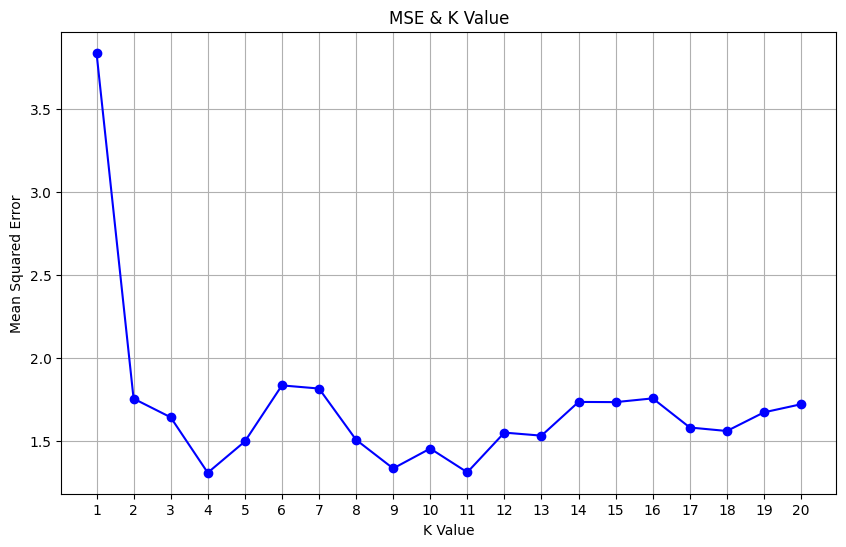

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE & K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()